In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('dataset_admissions.csv')

In [3]:
df.head()

,ADMIT,GRE,GPA,RANK
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


To build a model to classify the admission data

In [4]:
df.isnull().sum()

ADMIT    0
GRE      0
GPA      0
RANK     0
dtype: int64

In [5]:
features = df.drop(columns='ADMIT')
target = df[['ADMIT']]

In [6]:
x_train,x_test,y_train,y_test = train_test_split(features,target,train_size=0.75,random_state=100)

In [7]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(300, 3)
(100, 3)
(300, 1)
(100, 1)


In [8]:
# If it a multi class we use this function
#log_model = LogisticRegression(multi_class='ovr') 

In [9]:
log_model = LogisticRegression() 

In [10]:
log_model.fit(x_train,y_train)

C:\Users\91872\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [11]:
y_pred = log_model.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [12]:
accuracy_score(y_test,y_pred)

0.63

In [60]:
pred_prob = log_model.predict_proba(x_test)             # 1-Sigma    , Sigma
pred_prob

array([[0.68252194, 0.31747806],
       [0.87744779, 0.12255221],
       [0.48256059, 0.51743941],
       [0.86679745, 0.13320255],
       [0.93027558, 0.06972442],
       [0.69139853, 0.30860147],
       [0.61164891, 0.38835109],
       [0.82789895, 0.17210105],
       [0.78305596, 0.21694404],
       [0.73953191, 0.26046809],
       [0.88266987, 0.11733013],
       [0.58036675, 0.41963325],
       [0.84853289, 0.15146711],
       [0.73136098, 0.26863902],
       [0.62976917, 0.37023083],
       [0.86314428, 0.13685572],
       [0.58562528, 0.41437472],
       [0.88252093, 0.11747907],
       [0.82980416, 0.17019584],
       [0.83263703, 0.16736297],
       [0.8763285 , 0.1236715 ],
       [0.70645686, 0.29354314],
       [0.6034833 , 0.3965167 ],
       [0.52062455, 0.47937545],
       [0.53629979, 0.46370021],
       [0.77364867, 0.22635133],
       [0.74850837, 0.25149163],
       [0.71602515, 0.28397485],
       [0.81709857, 0.18290143],
       [0.84547159, 0.15452841],
       [0.

In [14]:
# Changing the thershold value

y_pred1 = [1 if x[1]>=0.4 else 0 for x in log_model.predict_proba(x_test)]

In [15]:
accuracy_score(y_test,y_pred1)

0.64

In [16]:
target.value_counts()

ADMIT
0        273
1        127
Name: count, dtype: int64

In [17]:
!pip install imblearn

In [18]:
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [19]:
## SMOTE

In [20]:
y_train.value_counts()

ADMIT
0        209
1         91
Name: count, dtype: int64

In [21]:
x_train.shape

(300, 3)

In [22]:
smote = SMOTE()

In [23]:
x_train,y_train = smote.fit_resample(x_train,y_train)

C:\Users\91872\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\91872\anaconda3\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [24]:
x_train.shape

(418, 3)

In [25]:
y_train.value_counts()

ADMIT
0        209
1        209
Name: count, dtype: int64

In [26]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(418, 3)
(100, 3)
(418, 1)
(100, 1)


In [27]:
# Random _under_sampling

In [32]:
rand_under = RandomUnderSampler()

In [33]:
x_train_under,y_train_undeer = rand_under.fit_resample(x_train,y_train)

C:\Users\91872\anaconda3\Lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Users\91872\anaconda3\Lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [34]:
x_train_under.shape

(418, 3)

In [35]:
y_train_undeer.value_counts()

ADMIT
0        209
1        209
Name: count, dtype: int64

In [ ]:
# Random _over_sampling

 ## Performance_metrics

In [36]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

In [57]:
conf = confusion_matrix(y_test,y_pred)
conf

array([[58,  6],
       [31,  5]], dtype=int64)

Text(0.5, 1.0, 'Confusion_Matrix')

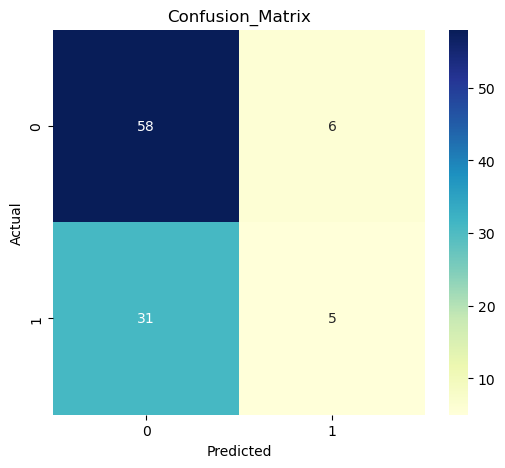

In [58]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf,annot=True,cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion_Matrix')

- coolwarm: Diverging color map (from blue to red).

- viridis: A perceptually uniform color map (green to purple).

- magma: A dark purple to bright yellow color map.

- plasma: Bright purple to bright yellow.

- Blues, Greens, Reds: Sequential single-color maps.

- YlGnBu: Yellow-green-blue sequential map.

Other Popular Color Maps
-----------------------------
Here are some additional color map options you can use to experiment with different styles:

Sequential:
-------------

- cmap='Blues'
- cmap='Greens'
- cmap='Oranges'
- cmap='Purples'
 
Diverging:
-----------

- cmap='Spectral'
- cmap='PiYG'
- cmap='RdYlBu'
  
Miscellaneous:
--------------

- cmap='magma'
- cmap='plasma'
- cmap='inferno'

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.91      0.76        64
           1       0.45      0.14      0.21        36

    accuracy                           0.63       100
   macro avg       0.55      0.52      0.49       100
weighted avg       0.58      0.63      0.56       100



## ROC_Curve

In [61]:
from sklearn.metrics import roc_auc_score,roc_curve

In [65]:
pred_prob1 = log_model.predict_proba(x_test)             # 1-Sigma    , Sigma
sigmoid = pred_prob1[:,1]
sigmoid

array([0.31747806, 0.12255221, 0.51743941, 0.13320255, 0.06972442,
       0.30860147, 0.38835109, 0.17210105, 0.21694404, 0.26046809,
       0.11733013, 0.41963325, 0.15146711, 0.26863902, 0.37023083,
       0.13685572, 0.41437472, 0.11747907, 0.17019584, 0.16736297,
       0.1236715 , 0.29354314, 0.3965167 , 0.47937545, 0.46370021,
       0.22635133, 0.25149163, 0.28397485, 0.18290143, 0.15452841,
       0.33835072, 0.21855785, 0.57668418, 0.30448175, 0.46928566,
       0.18879234, 0.1812364 , 0.32500417, 0.07920408, 0.70459161,
       0.12030266, 0.25814896, 0.40987618, 0.60202494, 0.31184054,
       0.4617968 , 0.17008111, 0.25372047, 0.32332685, 0.63463949,
       0.4746996 , 0.21452047, 0.42698081, 0.30815897, 0.32285258,
       0.22665029, 0.40680499, 0.43999652, 0.20839014, 0.42971859,
       0.36253274, 0.42147913, 0.33040565, 0.11533786, 0.41437472,
       0.21127291, 0.35568626, 0.38228807, 0.23242168, 0.18913716,
       0.25627192, 0.1197317 , 0.30469097, 0.59389981, 0.40528

In [67]:
auc_score = roc_auc_score(y_test,sigmoid)
auc_score

0.6139322916666666

In [91]:
fpr,tpr,thr = roc_curve(y_test,sigmoid)
print('Values of fpr :','\n',fpr)
print('\n')
print('Values of tpr :','\n',tpr)
print('\n')
print('Values of thr :','\n',thr)

Values of fpr : 
 [0.       0.015625 0.015625 0.03125  0.03125  0.078125 0.078125 0.09375
 0.09375  0.125    0.125    0.140625 0.140625 0.15625  0.15625  0.171875
 0.1875   0.21875  0.21875  0.265625 0.265625 0.28125  0.28125  0.328125
 0.328125 0.359375 0.359375 0.375    0.375    0.421875 0.421875 0.4375
 0.4375   0.453125 0.453125 0.46875  0.46875  0.5625   0.5625   0.578125
 0.578125 0.59375  0.59375  0.671875 0.671875 0.734375 0.734375 0.859375
 0.859375 0.890625 0.890625 0.921875 0.921875 0.984375 0.984375 1.      ]


Values of tpr : 
 [0.         0.         0.02777778 0.02777778 0.05555556 0.05555556
 0.11111111 0.11111111 0.13888889 0.13888889 0.16666667 0.16666667
 0.22222222 0.22222222 0.33333333 0.33333333 0.36111111 0.36111111
 0.38888889 0.38888889 0.41666667 0.41666667 0.44444444 0.44444444
 0.5        0.5        0.52777778 0.52777778 0.58333333 0.58333333
 0.63888889 0.63888889 0.66666667 0.66666667 0.69444444 0.69444444
 0.72222222 0.72222222 0.75       0.75       0.7777

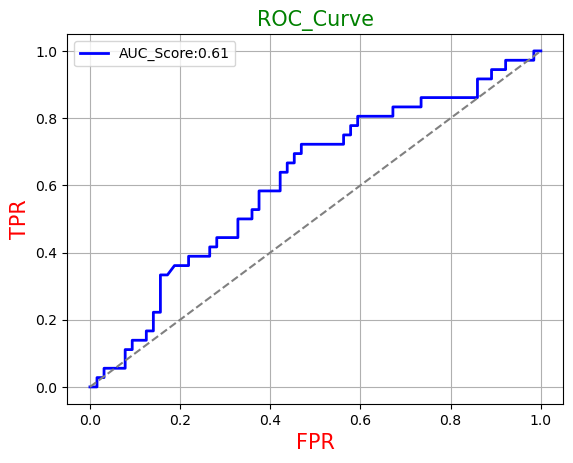

In [86]:
plt.plot(fpr,tpr,color='blue',linewidth=2,label=f'AUC_Score:{auc_score:.2f}')
plt.plot([0,1],linestyle='--',color='grey')
plt.grid()
plt.xlabel('FPR',color='red',size=15)
plt.ylabel('TPR',color='red',size=15)
plt.title('ROC_Curve',color='Green',size=15)
plt.legend()